In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
class Logistic_Regression:
  def __init__(self, lr=0.01, epoch=10):
    self.lr = lr
    self.epoch = epoch
    self.w = []
    self.b = 0

  def initialize_weight(self, dim):
    w = np.random.normal(0, 1, (dim, 10))
    b = np.random.rand(1)
    return w, b

  def sigmoid(self, x):
    s = 1/(1 + np.exp(-x))
    return s
  
  def softmax(self, x):
    s = np.exp(x) / np.sum(np.exp(x))
    return s

  def hypothesis(self, w, X, b):
    y_hat = self.softmax(np.matmul(X, w) + b)
    return y_hat
  
  def cost(self, y_hat, y, N):
    cost = -np.sum(y * np.log(y_hat + 0.00000001))
    return cost

  def predict(self, X):
    X = np.array(X)
    N = X.shape[0]
    Y_prediction = np.zeros((N, 10))
    w = self.w.reshape(X.shape[1], 10)
    b = self.b

    y_hat = self.hypothesis(w, X, b)
    for i in range(len(y_hat)):
      index = np.argmax(y_hat[i])
      Y_prediction[i][index] = 1.

    return Y_prediction

  def cal_gradient(self, w, y_hat, X, y):
    N = X.shape[1]
    delta_w = (1/N) * np.matmul(X.T, (y_hat - y))
    delta_b = (1/N) * np.sum(y_hat - y)
    grads = {"delta_w": delta_w,
             "delta_b": delta_b}
    return grads
  
  def gradient_position(self, w, b, X, Y):
    N = X.shape[0]
    y_hat = self.predict(X)
    cost = self.cost(y_hat, Y, N)
    grads = self.cal_gradient(w, y_hat, X, Y)
    return grads, cost

  def gradient_descent(self, w, b, X, Y, print_cost = False):
    costs = []
    for i in range(self.epoch):
      grads, cost = self.gradient_position(w, b, X, Y)

      delta_w = grads["delta_w"].reshape(-1, 10)
      delta_b = grads["delta_b"]

      w -= self.lr * delta_w
      b -= self.lr * delta_b

      if i% 10 == 0:
        costs.append(cost)
      if print_cost and i % 10 == 0:
        print(" Cost after iteration %i: %f"%(i, cost))
      
      params = {"w": w,
                "b": b}
    
    return params, costs

  def train_model(self, X_train, Y_train, X_test, Y_test, print_cost = False):
    dim = np.shape(X_train)[1]
    self.w, self.b = self.initialize_weight(dim)
    parameters, costs = self.gradient_descent(self.w, self.b, X_train, Y_train, print_cost=print_cost)

    self.w = parameters["w"]
    self.b = parameters["b"]

    Y_prediction_test = self.predict(X_test)
    Y_prediction_train = self.predict(X_train)
    
    train_score = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_score = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("test accuracy: {}%".format(test_score))
    
    result_dic = {"costs": costs,
                  "Y_prediction_test": Y_prediction_test,
                  "Y_prediction_train": Y_prediction_train,
                  "w": self.w,
                  "b": self.b,
                  "learning_rate": self.lr,
                  "train accuracy":train_score,
                  "test accuracy": test_score}
    return result_dic

In [ ]:
def zscore_norm(X):
  Z = (X - X.mean()) / X.std()
  return Z

In [ ]:
X_ = zscore_norm(X)
X_train = np.array(X_[:-10000])
X_test  = np.array(X_[-10000:])

Y_train = y[:-10000].astype(np.int)
Y_test  = y[-10000:].astype(np.int)

n_values = np.max(Y_train) + 1
Y_train = np.eye(n_values)[Y_train]
Y_test  = np.eye(n_values)[Y_test]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

In [ ]:
cls = Logistic_Regression()
result_dic = cls.train_model(X_train, Y_train, X_test, Y_test, print_cost=False)

test accuracy: 92.642%


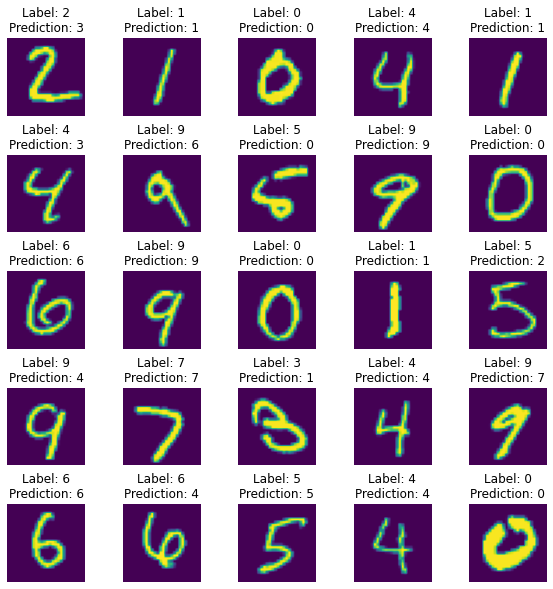

In [ ]:
plt.figure(figsize=(10,10))
j = 0
for i in range(1, 26):
  j = j + 1
  _X_ = X_test[i]
  title = "Label: " + str(np.argmax(Y_test[i])) + "\nPrediction: " + str(np.argmax(cls.hypothesis(result_dic["w"], _X_, result_dic["b"])))
  plt.subplot(5, 5, j)
  plt.axis('off')
  plt.subplots_adjust(hspace=0.5)
  plt.title(title)
  plt.imshow(_X_.reshape(28, 28))